<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Experiment (IX): HR diagram for the Pleiades and Hyades Clusters with Hipparcos Catalog, and Main Sequence Fiting__


In [2]:
# Importing Main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.stats import linregress

## Data Perparation

In [4]:
# Introducing the Data of Pleiades
data_path = 'Pleiades.xls'
#Transform Data to DataFrame
df_p = pd.read_excel(data_path, sheet_name="hipparcos", engine="xlrd")
df_p = df_p.drop("_Search_Offset", axis='columns')
#Display
df_p.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,name,vmag,ra_deg,dec_deg,bv_color
0,HIP 17608,4.14,56.581501,23.948462,-0.051
1,HIP 17702,2.85,56.871101,24.105242,-0.086
2,HIP 17573,3.87,56.456638,24.367858,-0.063
3,HIP 17704,6.83,56.872674,24.288453,0.066
4,HIP 17499,3.72,56.218848,24.113448,-0.105


In [5]:
# Introducing the Data of Hyades
data_path = 'Hyades.xls'
#Transform Data to DataFrame
df_h = pd.read_excel(data_path, sheet_name="hipparcos", engine="xlrd")
df_h = df_h.drop("_Search_Offset", axis='columns')
#Display
df_h.head()

,name,vmag,ra_deg,dec_deg,bv_color
0,HIP 20978,9.08,67.490262,16.672909,0.865
1,HIP 20899,7.83,67.200966,17.285537,0.609
2,HIP 20935,7.02,67.335371,17.545012,0.526
3,HIP 20877,4.96,67.109855,16.359629,1.137
4,HIP 20756,6.86,66.712985,17.028760,1.494


## Plotting HR Diagrams

#### y-axis represents stellar brightness (magnitude). 
#### However, astronomical magnitude is defined in reverse order due to the relation between magnitudes:  
$$ m1​−m2​= −2.5 log_{10}​(\frac{​I1}{I2}​​) $$

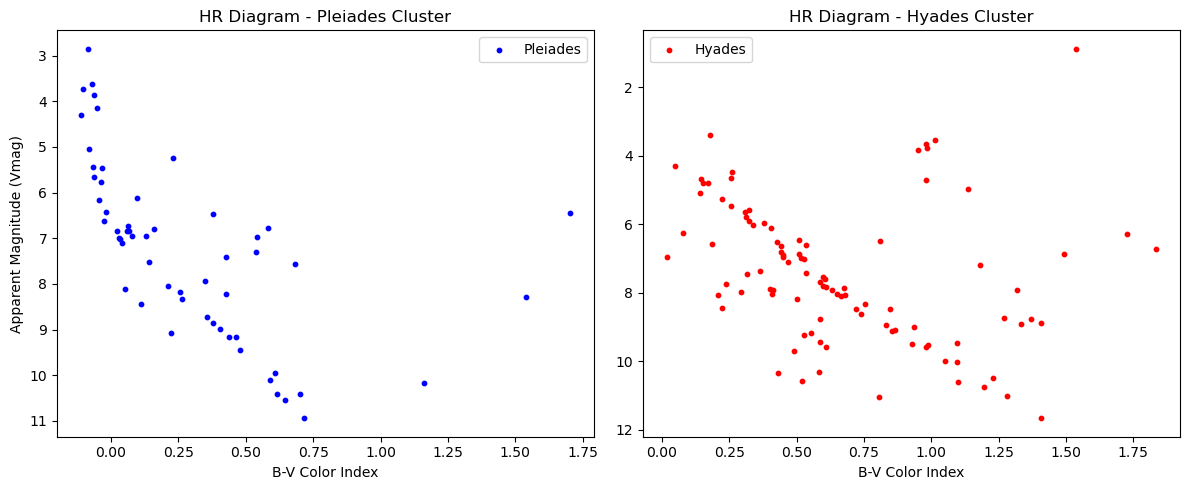

In [8]:
# Create HR diagrams for both clusters separately
plt.figure(figsize=(12, 5))

# Plot for cluster 1
plt.subplot(1, 2, 1)
plt.scatter(df_p["bv_color"], df_p["vmag"], color='blue', label="Pleiades", s=10)
plt.gca().invert_yaxis()  # Reverse y-axis for HR diagram
plt.xlabel("B-V Color Index")
plt.ylabel("Apparent Magnitude (Vmag)")
plt.title("HR Diagram - Pleiades Cluster")
plt.legend()

# Plot for cluster 2
plt.subplot(1, 2, 2)
plt.scatter(df_h["bv_color"], df_h["vmag"], color='red', label="Hyades", s=10)
plt.gca().invert_yaxis()
plt.xlabel("B-V Color Index")
plt.title("HR Diagram - Hyades Cluster")
plt.legend()

plt.tight_layout()
plt.show()

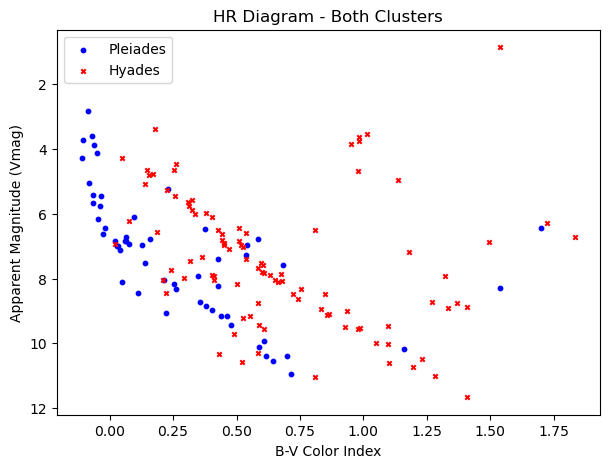

In [9]:
# Plot both clusters on the same graph
plt.figure(figsize=(7, 5))
plt.scatter(df_p["bv_color"], df_p["vmag"], color='blue', marker='o', label="Pleiades", s=10)
plt.scatter(df_h["bv_color"], df_h["vmag"], color='red', marker='x', label="Hyades", s=10)
plt.gca().invert_yaxis()
plt.xlabel("B-V Color Index")
plt.ylabel("Apparent Magnitude (Vmag)")
plt.title("HR Diagram - Both Clusters")
plt.legend()
plt.show()

## CMD 

#### code from MilkyWay Galaxy Stellar Kinematics Exp

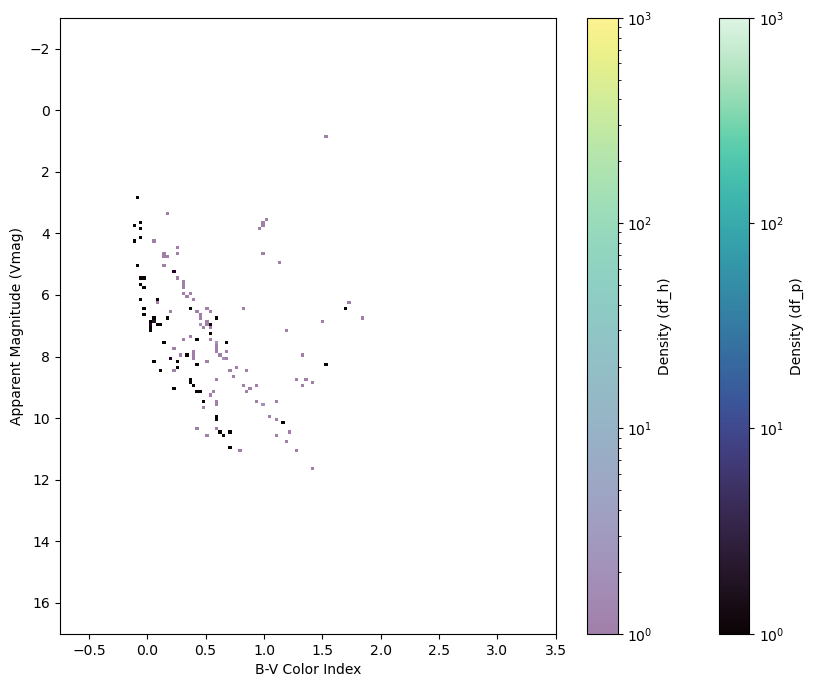

In [12]:
# Define bin edges for the 2D histogram
cmd_res = (np.linspace(-0.75, 3.5, 151), np.linspace(-3, 17, 201))

# Create a figure
fig = plt.figure(figsize=(10, 8))

# Add a subplot
ax = fig.add_subplot(111)

# Create 2D histogram (Color-Magnitude Diagram)
h = ax.hist2d(
    df_p['bv_color'],  # X-axis: B-V color index (temperature proxy)
    df_p['vmag'],  # Y-axis: Apparent magnitude
    bins=cmd_res,  # Define bin edges
    norm=LogNorm(1.0, 1e3),  # Logarithmic color scale
    cmap="mako"  # colormap
)

# 2D Histogram for df_h (second dataset, red colormap)
h2 = ax.hist2d(
    df_h['bv_color'], df_h['vmag'],  
    bins=cmd_res, norm=LogNorm(1.0, 1e3),  
    cmap="viridis", alpha=0.5  # Adjust transparency
)

# Add a colorbar
cb1 = fig.colorbar(h[3], ax=ax, label="Density (df_p)")
cb2 = fig.colorbar(h2[3], ax=ax, label="Density (df_h)", location="right")
cb1.ax.minorticks_off()  # Disable minor ticks on colorbar

# Invert Y-axis (brighter stars on top)
ax.invert_yaxis()

# Set labels
ax.set_xlabel('B-V Color Index')  # X-axis: Color index (temperature)
ax.set_ylabel('Apparent Magnitude (Vmag)')  # Y-axis: Brightness

# Set Y-axis ticks at intervals of 2 magnitudes
ax.set_yticks(np.arange(-2, 18, 2))

# Show the plot
plt.show()

#### Enhanced plot

In [14]:
# Remove non-finite values (NaN, Inf) from both datasets
df_p_clean = df_p.replace([np.inf, -np.inf], np.nan).dropna(subset=['bv_color', 'vmag'])
df_h_clean = df_h.replace([np.inf, -np.inf], np.nan).dropna(subset=['bv_color', 'vmag'])

# Concatenate both datasets for global range calculation
bv_all = np.concatenate([df_p_clean['bv_color'], df_h_clean['bv_color']])
vmag_all = np.concatenate([df_p_clean['vmag'], df_h_clean['vmag']])

# Define bin edges dynamically based on min/max values
cmd_res = (
    np.linspace(bv_all.min(), bv_all.max(), 151), 
    np.linspace(vmag_all.min(), vmag_all.max(), 201)
)

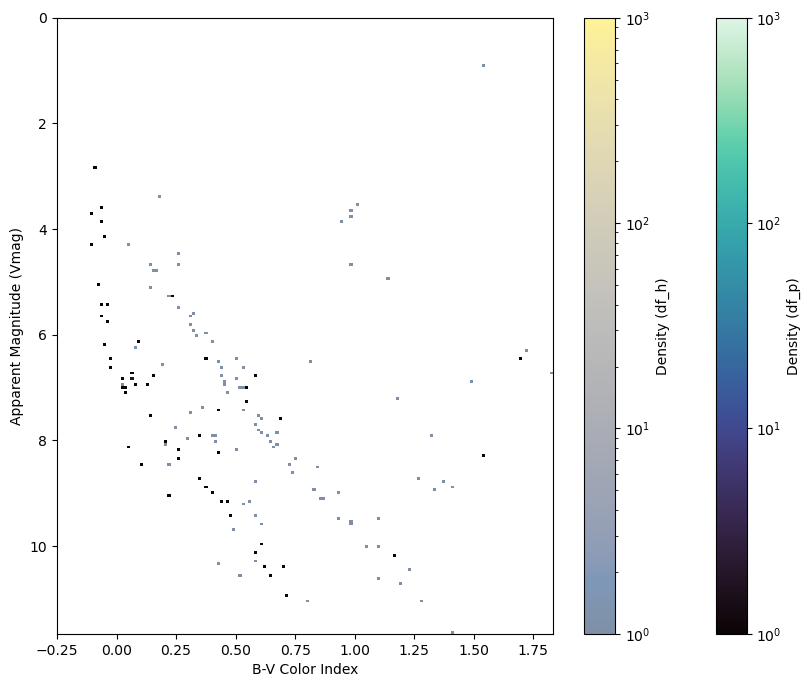

In [15]:
# Create a figure
fig = plt.figure(figsize=(10, 8))

# Add a subplot
ax = fig.add_subplot(111)

# Create 2D histogram (Color-Magnitude Diagram)
h = ax.hist2d(
    df_p['bv_color'],  # X-axis: B-V color index (temperature proxy)
    df_p['vmag'],  # Y-axis: Apparent magnitude
    bins=cmd_res,  # Define bin edges
    norm=LogNorm(1.0, 1e3),  # Logarithmic color scale
    cmap="mako"  #colormap
)

# 2D Histogram for df_h (second dataset, red colormap)
h2 = ax.hist2d(
    df_h['bv_color'], df_h['vmag'],  
    bins=cmd_res, norm=LogNorm(1.0, 1e3),  
    cmap="cividis", alpha=0.5  # Adjust transparency
)

# Add a colorbar
cb1 = fig.colorbar(h[3], ax=ax, label="Density (df_p)")
cb2 = fig.colorbar(h2[3], ax=ax, label="Density (df_h)", location="right")
cb1.ax.minorticks_off()  # Disable minor ticks on colorbar

# Invert Y-axis (brighter stars on top)
ax.invert_yaxis()

# Set labels
ax.set_xlabel('B-V Color Index')  # X-axis: Color index (temperature)
ax.set_ylabel('Apparent Magnitude (Vmag)')  # Y-axis: Brightness

# Set Y-axis ticks at intervals of 2 magnitudes
ax.set_yticks(np.arange(0, 12, 2))
ax.set_xticks(np.arange(-0.25, 2, 0.25))
# Show the plot
plt.show()

## __Questions:__

1) __Which cluster older? Why?__
- Hyades is older than Pleiades. 
- Because in HR diagram, older clusters have more evolved stars and the main sequence turnoff spread out happens earlier for older clusters and point is directly related to the age of the cluster.
- The Pleiades cluster (blue points) has a strong main sequence, while the Hyades (red points) has more stars that have evolved off the main sequence into the subgiant and giant phase.
- Therefore, Hyades is older than Pleiades. 

2) __Which cluster is closer? Why?__
- Hyades is closer than Pleiades.
- Since, Apparent magnitude (Vmag) depends on distance and absolute magnitude.
- The Hyades stars appear systematically brighter than Pleiades stars of the same color.
- Therefore, This suggests that Hyades is closer to Earth than Pleiades.

3) __What does the gap between the two cluster main sequence stars represent?__
- The gap represents the difference in distances between the two clusters.

3) __Is the number and arrangement of stars in your plots similar to given ones? If not, why?__
- they are similar.

4) __Finally:__

Using the modulus distance equation: $ m2−m1​= −5 log_{10}​(\frac{​d1}{d2}​​) $ with two similar main sequence stars on
the Pleiades and Hyades main-sequence branch to
- for Pleiades : __HIP 18106__: m1 = 6.77
- for Hyades: __HIP 20978__: m2 = 9.08 , d2 = 153 ly
- Theeoretical distane = 445 ly 
- d1 (distance to Pleiadus) = 443.29 ly
- Error = 0.382 %

---
## Refrences:
[1] NASA, “Messier 45 (The Pleiades) - NASA Science,” science.nasa.gov. https://science.nasa.gov/mission/hubble/science/explore-the-night-sky/hubble-messier-catalog/messier-45/
